In [1]:
import pandas as pd
import json
import networkx as nx
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#loading interactions file 
with open('C://Users//Chaitali//Documents//upwork//pop//M2.976_20201_PAC1-Enunciat//data//starwars-episode-5-interactions.json') as interactions_file:
    data_interactions=json.load(interactions_file)
#loading mentions file
with open('C://Users//Chaitali//Documents//upwork//pop//M2.976_20201_PAC1-Enunciat//data//starwars-episode-5-mentions.json') as mentions_file:
    data_mentions=json.load(mentions_file)
    
#print mentions and interactions file
print(data_interactions)
print(data_mentions)

{'nodes': [{'name': 'LUKE', 'value': 44, 'colour': '#3881e5'}, {'name': 'HAN', 'value': 50, 'colour': '#ff9400'}, {'name': 'RIEEKAN', 'value': 7, 'colour': '#808080'}, {'name': 'LEIA', 'value': 45, 'colour': '#DCDCDC'}, {'name': 'C-3PO', 'value': 45, 'colour': '#FFD700'}, {'name': 'DERLIN', 'value': 3, 'colour': '#808080'}, {'name': 'OBI-WAN', 'value': 3, 'colour': '#48D1CC'}, {'name': 'ZEV', 'value': 6, 'colour': '#808080'}, {'name': 'PIETT', 'value': 9, 'colour': '#808080'}, {'name': 'OZZEL', 'value': 3, 'colour': '#808080'}, {'name': 'DARTH VADER', 'value': 20, 'colour': '#000000'}, {'name': 'DACK', 'value': 4, 'colour': '#808080'}, {'name': 'WEDGE', 'value': 8, 'colour': '#808080'}, {'name': 'JANSON', 'value': 4, 'colour': '#808080'}, {'name': 'NEEDA', 'value': 3, 'colour': '#808080'}, {'name': 'EMPEROR', 'value': 2, 'colour': '#191970'}, {'name': 'YODA', 'value': 6, 'colour': '#9ACD32'}, {'name': 'BOBA FETT', 'value': 5, 'colour': '#808080'}, {'name': 'LANDO', 'value': 22, 'colour

In [4]:
#separting nodes and links from interactions and putting it into dataframe
links_i=data_interactions['links']
nodes_i=data_interactions['nodes']
linksi=pd.DataFrame(links_i)
nodesi=pd.DataFrame(nodes_i)
nodesi,linksi

(           name  value   colour
 0          LUKE     44  #3881e5
 1           HAN     50  #ff9400
 2       RIEEKAN      7  #808080
 3          LEIA     45  #DCDCDC
 4         C-3PO     45  #FFD700
 5        DERLIN      3  #808080
 6       OBI-WAN      3  #48D1CC
 7           ZEV      6  #808080
 8         PIETT      9  #808080
 9         OZZEL      3  #808080
 10  DARTH VADER     20  #000000
 11         DACK      4  #808080
 12        WEDGE      8  #808080
 13       JANSON      4  #808080
 14        NEEDA      3  #808080
 15      EMPEROR      2  #191970
 16         YODA      6  #9ACD32
 17    BOBA FETT      5  #808080
 18        LANDO     22  #808080,     source  target  value
 0        1       0      4
 1        1       2      3
 2        3       2      4
 3        1       3     33
 4        4       1     27
 5        4       5      1
 6        0       6      2
 7        1       6      1
 8        1       7      1
 9        4       0      1
 10       4       3     23
 11       3     

In [5]:
links_m=data_mentions['links']
nodes_m=data_mentions['nodes']
linksm=pd.DataFrame(links_m)
nodesm=pd.DataFrame(nodes_m)
linksm,nodesm

(    source  target  value
 0        1       0     12
 1        0       2      1
 2        1       2      1
 3        3       1     40
 4        1       4     48
 ..     ...     ...    ...
 85      21       8      2
 86      22       8      5
 87      21       0      1
 88       3       5      1
 89       5       0      1
 
 [90 rows x 3 columns],            name  value   colour
 0          LUKE     83  #3881e5
 1           HAN     66  #ff9400
 2          SNAP      2  #808080
 3     CHEWBACCA     60  #A0522D
 4          LEIA     73  #DCDCDC
 5         JABBA      4  #808080
 6       RIEEKAN      8  #808080
 7         C-3PO     54  #FFD700
 8         R2-D2     35  #bde0f6
 9        DERLIN      3  #808080
 10      OBI-WAN     11  #48D1CC
 11         YODA      9  #9ACD32
 12          ZEV      8  #808080
 13  DARTH VADER     43  #000000
 14        PIETT     10  #808080
 15        OZZEL      3  #808080
 16         DACK      5  #808080
 17        WEDGE     10  #808080
 18       JANSON      5 

In [6]:
linksi

,source,target,value
0,1,0,4
1,1,2,3
2,3,2,4
3,1,3,33
4,4,1,27
5,4,5,1
6,0,6,2
7,1,6,1
8,1,7,1
9,4,0,1


In [7]:
linksm

,source,target,value
0,1,0,12
1,0,2,1
2,1,2,1
3,3,1,40
4,1,4,48
...,...,...,...
85,21,8,2
86,22,8,5
87,21,0,1
88,3,5,1


In [8]:
linksm[['source','target']]=linksm[['source','target']].replace(nodesm.name)
print(linksm)

       source target  value
0         HAN   LUKE     12
1        LUKE   SNAP      1
2         HAN   SNAP      1
3   CHEWBACCA    HAN     40
4         HAN   LEIA     48
..        ...    ...    ...
85  BOBA FETT  R2-D2      2
86      LANDO  R2-D2      5
87  BOBA FETT   LUKE      1
88  CHEWBACCA  JABBA      1
89      JABBA   LUKE      1

[90 rows x 3 columns]


In [9]:
linksi[['source','target']]=linksi[['source','target']].replace(nodesi.name)
print(linksi)

         source       target  value
0           HAN         LUKE      4
1           HAN      RIEEKAN      3
2          LEIA      RIEEKAN      4
3           HAN         LEIA     33
4         C-3PO          HAN     27
5         C-3PO       DERLIN      1
6          LUKE      OBI-WAN      2
7           HAN      OBI-WAN      1
8           HAN          ZEV      1
9         C-3PO         LUKE      1
10        C-3PO         LEIA     23
11         LEIA         LUKE      1
12        C-3PO      RIEEKAN      1
13        OZZEL        PIETT      2
14  DARTH VADER        PIETT      7
15  DARTH VADER        OZZEL      2
16       DERLIN         LEIA      1
17         DACK         LUKE      3
18         LUKE        WEDGE      2
19       JANSON        WEDGE      2
20         LUKE          ZEV      1
21  DARTH VADER        NEEDA      1
22        NEEDA        PIETT      1
23  DARTH VADER      EMPEROR      1
24         LUKE         YODA      5
25    BOBA FETT        PIETT      1
26    BOBA FETT  DARTH VADER

In [10]:
con=pd.concat([nodesi,nodesm])
conodes=pd.DataFrame(con)
conodes

,name,value,colour
0,LUKE,44,#3881e5
1,HAN,50,#ff9400
2,RIEEKAN,7,#808080
3,LEIA,45,#DCDCDC
4,C-3PO,45,#FFD700
5,DERLIN,3,#808080
6,OBI-WAN,3,#48D1CC
7,ZEV,6,#808080
8,PIETT,9,#808080
9,OZZEL,3,#808080


In [11]:
nodes=conodes.groupby(by=['name','colour']).sum().reset_index()
type(nodes)
print(nodes)

           name   colour  value
0     BOBA FETT  #808080     15
1         C-3PO  #FFD700     99
2     CHEWBACCA  #A0522D     60
3          DACK  #808080      9
4   DARTH VADER  #000000     63
5        DERLIN  #808080      6
6       EMPEROR  #191970      9
7           HAN  #ff9400    116
8         JABBA  #808080      4
9        JANSON  #808080      9
10        LANDO  #808080     61
11         LEIA  #DCDCDC    118
12         LUKE  #3881e5    127
13        NEEDA  #808080      8
14      OBI-WAN  #48D1CC     14
15        OZZEL  #808080      6
16        PIETT  #808080     19
17        R2-D2  #bde0f6     35
18      RIEEKAN  #808080     15
19         SNAP  #808080      2
20        WEDGE  #808080     18
21         YODA  #9ACD32     15
22          ZEV  #808080     14


In [12]:
can=pd.concat([linksi,linksm])
colinks=pd.DataFrame(can)
colinks

,source,target,value
0,HAN,LUKE,4
1,HAN,RIEEKAN,3
2,LEIA,RIEEKAN,4
3,HAN,LEIA,33
4,C-3PO,HAN,27
...,...,...,...
85,BOBA FETT,R2-D2,2
86,LANDO,R2-D2,5
87,BOBA FETT,LUKE,1
88,CHEWBACCA,JABBA,1


In [13]:
links=colinks.groupby(by=['source','target']).sum().reset_index()
type(links)
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
source    90 non-null object
target    90 non-null object
value     90 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.2+ KB


In [14]:
node_name=nodes['name']
node_col=nodes['colour']
total_scene=nodes['value']
edges_source=links['source']
edges_target=links['target']
weights=links['value']
edge_data={'source':links['source'],'target':links['target'],'weight':links['value']}

In [19]:
G=nx.Graph() #creating a graph

In [22]:
G.add_nodes_from(node_name) #adding nodes
G.nodes()

NodeView(('BOBA FETT', 'C-3PO', 'CHEWBACCA', 'DACK', 'DARTH VADER', 'DERLIN', 'EMPEROR', 'HAN', 'JABBA', 'JANSON', 'LANDO', 'LEIA', 'LUKE', 'NEEDA', 'OBI-WAN', 'OZZEL', 'PIETT', 'R2-D2', 'RIEEKAN', 'SNAP', 'WEDGE', 'YODA', 'ZEV'))

In [23]:
#adding edges
edge_list = [(x, y, {'weight': z}) for x, y, z in links.itertuples(index=False)]
edge_labels = {(x, y): z.get('weight') for x, y, z in edge_list}
print (edge_labels)

{('BOBA FETT', 'C-3PO'): 4, ('BOBA FETT', 'CHEWBACCA'): 3, ('BOBA FETT', 'DARTH VADER'): 8, ('BOBA FETT', 'HAN'): 7, ('BOBA FETT', 'JABBA'): 1, ('BOBA FETT', 'LANDO'): 8, ('BOBA FETT', 'LEIA'): 5, ('BOBA FETT', 'LUKE'): 1, ('BOBA FETT', 'PIETT'): 2, ('BOBA FETT', 'R2-D2'): 2, ('C-3PO', 'CHEWBACCA'): 40, ('C-3PO', 'DARTH VADER'): 3, ('C-3PO', 'DERLIN'): 2, ('C-3PO', 'HAN'): 62, ('C-3PO', 'LANDO'): 22, ('C-3PO', 'LEIA'): 64, ('C-3PO', 'LUKE'): 12, ('C-3PO', 'R2-D2'): 19, ('C-3PO', 'RIEEKAN'): 3, ('CHEWBACCA', 'DARTH VADER'): 3, ('CHEWBACCA', 'DERLIN'): 1, ('CHEWBACCA', 'HAN'): 40, ('CHEWBACCA', 'JABBA'): 1, ('CHEWBACCA', 'LANDO'): 25, ('CHEWBACCA', 'LEIA'): 47, ('CHEWBACCA', 'LUKE'): 14, ('CHEWBACCA', 'R2-D2'): 14, ('CHEWBACCA', 'RIEEKAN'): 2, ('DACK', 'LUKE'): 7, ('DARTH VADER', 'EMPEROR'): 7, ('DARTH VADER', 'HAN'): 8, ('DARTH VADER', 'JABBA'): 1, ('DARTH VADER', 'LANDO'): 11, ('DARTH VADER', 'LEIA'): 6, ('DARTH VADER', 'LUKE'): 17, ('DARTH VADER', 'NEEDA'): 5, ('DARTH VADER', 'OBI-WAN

In [25]:
G = nx.from_edgelist(edge_list)

In [71]:
print('Total number of nodes: ',len(G.nodes()))
print('Total number of edges: ',len(G.edges()))

Total number of nodes:  23
Total number of edges:  90


In [27]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

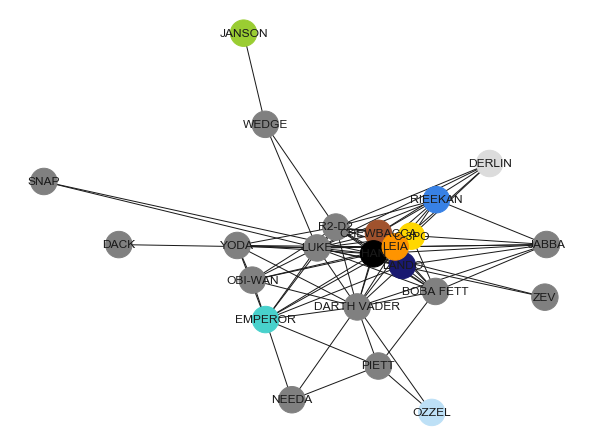

In [29]:
#plotting without weights
plt.figure(figsize=(8,6))
nx.draw(G,with_labels=True,edge_attr = True,node_color=node_col,node_size=700)
plt.show()


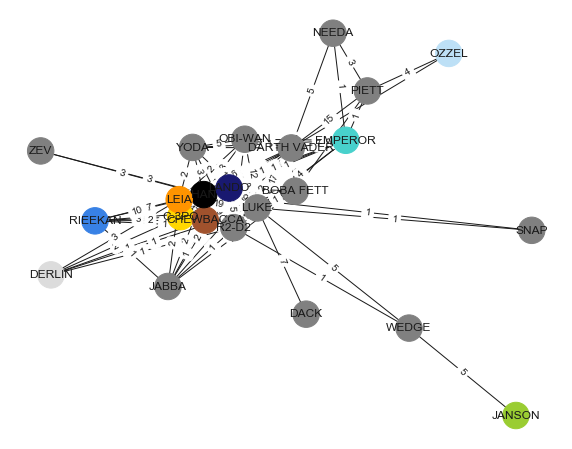

In [32]:
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G)
nx.draw_networkx_edge_labels(G, pos, edge_labels)
nx.draw(G, pos,with_labels=True,edge_attr = True,node_color=node_col,node_size=700)
plt.show()

In [ ]:
#exporting graph
nx.write_graphml(G, "a.graphml")

In [33]:
#calculate degree centrality
deg_centrality=nx.degree_centrality(G)  
print(deg_centrality)

{'BOBA FETT': 0.4545454545454546, 'C-3PO': 0.4545454545454546, 'CHEWBACCA': 0.5, 'DARTH VADER': 0.6818181818181819, 'HAN': 0.6818181818181819, 'JABBA': 0.36363636363636365, 'LANDO': 0.4545454545454546, 'LEIA': 0.6363636363636364, 'LUKE': 0.8181818181818182, 'PIETT': 0.2272727272727273, 'R2-D2': 0.6363636363636364, 'DERLIN': 0.2272727272727273, 'RIEEKAN': 0.3181818181818182, 'DACK': 0.045454545454545456, 'EMPEROR': 0.4545454545454546, 'NEEDA': 0.13636363636363635, 'OBI-WAN': 0.3181818181818182, 'OZZEL': 0.09090909090909091, 'YODA': 0.3181818181818182, 'SNAP': 0.09090909090909091, 'ZEV': 0.09090909090909091, 'JANSON': 0.045454545454545456, 'WEDGE': 0.13636363636363635}


In [34]:
#Exercise 1.2
deg=nx.degree(G)
print(deg)

[('BOBA FETT', 10), ('C-3PO', 10), ('CHEWBACCA', 11), ('DARTH VADER', 15), ('HAN', 15), ('JABBA', 8), ('LANDO', 10), ('LEIA', 14), ('LUKE', 18), ('PIETT', 5), ('R2-D2', 14), ('DERLIN', 5), ('RIEEKAN', 7), ('DACK', 1), ('EMPEROR', 10), ('NEEDA', 3), ('OBI-WAN', 7), ('OZZEL', 2), ('YODA', 7), ('SNAP', 2), ('ZEV', 2), ('JANSON', 1), ('WEDGE', 3)]


Degree shows how many connections does each character have in the network, Looking at the degree we get that Janson and Dack are the least connected from the rest of the characters, i.e they've communicated/contacted with the least number of people (one person), followed by Snap(2),Zev(2) and Ozzel(2)

In [35]:
density = nx.density(G)
density

0.3557312252964427

In [36]:
#Ex 1.3 Minimum and maximum degree of the graph
min_ = min(deg, key=lambda e: e[1])
max_ = max(deg, key=lambda e: e[1])
print('The minimum Degree of Graph is ',min_)
print('The maximum Degree of Graph is ',max_)

The minimum Degree of Graph is  ('DACK', 1)
The maximum Degree of Graph is  ('LUKE', 18)


In [37]:
#mean of degrees
mean_deg=sum([d for (n, d) in nx.degree(G)]) / float(G.number_of_nodes())
print(mean_deg)

7.826086956521739


In [38]:
degree_sequence=sorted(deg,key=lambda e: e[1],reverse=False) # degree sequence
#print "Degree sequence", degree_sequence
degree_sequence

[('DACK', 1),
 ('JANSON', 1),
 ('OZZEL', 2),
 ('SNAP', 2),
 ('ZEV', 2),
 ('NEEDA', 3),
 ('WEDGE', 3),
 ('PIETT', 5),
 ('DERLIN', 5),
 ('RIEEKAN', 7),
 ('OBI-WAN', 7),
 ('YODA', 7),
 ('JABBA', 8),
 ('BOBA FETT', 10),
 ('C-3PO', 10),
 ('LANDO', 10),
 ('EMPEROR', 10),
 ('CHEWBACCA', 11),
 ('LEIA', 14),
 ('R2-D2', 14),
 ('DARTH VADER', 15),
 ('HAN', 15),
 ('LUKE', 18)]

In [39]:
#distribution of degrees
degrees = [k for n,k in G.degree]

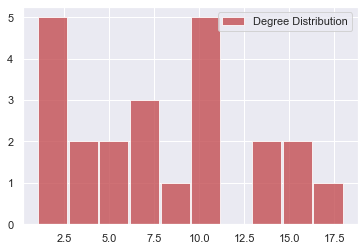

In [40]:
plt.hist(degrees,color="r",alpha=0.8, rwidth=0.95,label='Degree Distribution')
plt.legend()
plt.show()

here what we see is, only one character has the highest degree.i.e that character is connected to most of the nodes. and there are 5 characters with the lowest degrees,i.e connected to the least number of characters


In [41]:
#Ex 1.4
deg_centrality=nx.degree_centrality(G)   #degree centrality
print(deg_centrality)

{'BOBA FETT': 0.4545454545454546, 'C-3PO': 0.4545454545454546, 'CHEWBACCA': 0.5, 'DARTH VADER': 0.6818181818181819, 'HAN': 0.6818181818181819, 'JABBA': 0.36363636363636365, 'LANDO': 0.4545454545454546, 'LEIA': 0.6363636363636364, 'LUKE': 0.8181818181818182, 'PIETT': 0.2272727272727273, 'R2-D2': 0.6363636363636364, 'DERLIN': 0.2272727272727273, 'RIEEKAN': 0.3181818181818182, 'DACK': 0.045454545454545456, 'EMPEROR': 0.4545454545454546, 'NEEDA': 0.13636363636363635, 'OBI-WAN': 0.3181818181818182, 'OZZEL': 0.09090909090909091, 'YODA': 0.3181818181818182, 'SNAP': 0.09090909090909091, 'ZEV': 0.09090909090909091, 'JANSON': 0.045454545454545456, 'WEDGE': 0.13636363636363635}


Centrality indicates how important the character is in connecting the network together. Degree centrality here is simply the number of connections the node has in the network. Here it corresponds to the total number of scenes where each character speaks. So, by that we understand that Luke is the most important characters in the movie.Followed by Han, Darth Vader, Liea ,R2-D2.

In [48]:
betweeness_cent=nx.betweenness_centrality(G)
print(betweeness_cent)

{'BOBA FETT': 0.025354275354275365, 'C-3PO': 0.00975019449045423, 'CHEWBACCA': 0.012275447015706754, 'DARTH VADER': 0.16808538983863652, 'HAN': 0.08714042090665468, 'JABBA': 0.0033482630885228286, 'LANDO': 0.0040094825809111525, 'LEIA': 0.03308891685515062, 'LUKE': 0.29066467443090815, 'PIETT': 0.00927643784786642, 'R2-D2': 0.09246842623466, 'DERLIN': 0.0, 'RIEEKAN': 0.0010822510822510823, 'DACK': 0.0, 'EMPEROR': 0.051334608152789965, 'NEEDA': 0.0, 'OBI-WAN': 0.0, 'OZZEL': 0.0, 'YODA': 0.0, 'SNAP': 0.0, 'ZEV': 0.0, 'JANSON': 0.0, 'WEDGE': 0.09090909090909091}


Betweenness Centrality is the centrality of control.It quantifies how many times a particular node comes in the shortest chosen path between two other nodes. The nodes with high betweenness centrality can have a strategic control and influence on others. An individual at such a strategic position can influence the whole group, by either withholding or coloring the information in transmission. The nodes with high betweenness centrality play a significant role in the communication/information flow within the network. Here, Luke has the highest betweeness centrality, which shows that he's the central character , followed by Darth Vader. Looking at how popular Luke and Darth Vader is through out statistical inferences, movie's protagonist is Luke or Darth Vader.

In [49]:
nx.density(G) # Average edge density of the Graphs

0.3557312252964427

In [50]:
nx.average_shortest_path_length(G)

1.8023715415019763

In [51]:
G_nodes=G.nodes()
nx.clustering(G,G_nodes)

{'BOBA FETT': 0.7777777777777778,
 'C-3PO': 0.8222222222222222,
 'CHEWBACCA': 0.8,
 'DARTH VADER': 0.5238095238095238,
 'HAN': 0.5523809523809524,
 'JABBA': 0.8928571428571429,
 'LANDO': 0.8666666666666667,
 'LEIA': 0.6593406593406593,
 'LUKE': 0.4117647058823529,
 'PIETT': 0.5,
 'R2-D2': 0.5934065934065934,
 'DERLIN': 1.0,
 'RIEEKAN': 0.9047619047619048,
 'DACK': 0,
 'EMPEROR': 0.6444444444444445,
 'NEEDA': 1.0,
 'OBI-WAN': 1.0,
 'OZZEL': 1.0,
 'YODA': 1.0,
 'SNAP': 1.0,
 'ZEV': 1.0,
 'JANSON': 0,
 'WEDGE': 0.3333333333333333}

In [52]:
most_imp_link=nx.eigenvector_centrality(G)
for w in sorted(most_imp_link,key=most_imp_link.get,reverse=True):
    print(w,most_imp_link[w])

LUKE 0.3362696488738733
LEIA 0.3180475593833171
HAN 0.31668247293896246
R2-D2 0.30540034765776675
DARTH VADER 0.3051029126496087
CHEWBACCA 0.2677529384026732
LANDO 0.2587396710943327
C-3PO 0.24995380402083098
BOBA FETT 0.24692638160889877
EMPEROR 0.218993815743414
JABBA 0.2086097488678704
RIEEKAN 0.1868169190119733
OBI-WAN 0.18523296094517955
YODA 0.18523296094517955
DERLIN 0.13781672194583616
PIETT 0.08053995179627878
SNAP 0.060908585767151635
ZEV 0.060908585767151635
WEDGE 0.06038157462795587
NEEDA 0.056402068957890246
OZZEL 0.035973751406184244
DACK 0.03136784569944839
JANSON 0.005632501328284155


Like degree centrality, EigenCentrality measures a node’s influence based on the number of links it has to other nodes in the network. EigenCentrality then goes a step further by also taking into account how well connected a node is, and how many links their connections have, and so on through the network. As we see here again, the most influential is Luke followed by Leia and Han.

In [53]:
#pagerank
pagerank=nx.pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight',dangling=None)
print(pagerank)

{'BOBA FETT': 0.026273752573995595, 'C-3PO': 0.10409027494309325, 'CHEWBACCA': 0.08710145121152542, 'DARTH VADER': 0.06923158749761936, 'HAN': 0.12798375870108647, 'JABBA': 0.01158341728794369, 'LANDO': 0.071161673557388, 'LEIA': 0.13422357547505903, 'LUKE': 0.10087059615645445, 'PIETT': 0.026509585419605054, 'R2-D2': 0.05400274016316917, 'DERLIN': 0.009855342653898995, 'RIEEKAN': 0.017604799077402207, 'DACK': 0.01034466054191701, 'EMPEROR': 0.019952430447013655, 'NEEDA': 0.013030066707252083, 'OBI-WAN': 0.02572506959237046, 'OZZEL': 0.01255383589731932, 'YODA': 0.0230402239986946, 'SNAP': 0.007469289400513276, 'ZEV': 0.009364389940670261, 'JANSON': 0.015302275259275121, 'WEDGE': 0.022725203496733633}


PageRank is a variant of EigenCentrality, also assigning nodes a score based on their connections, and their connections’ connections. The difference is that PageRank also takes link direction and weight into account – so links can only pass influence in one direction, and pass different amounts of influence. Unlinke the previous observations, pagerank shows us that which characters influence beyond their direct connection into the wider connection, it shows that Han,Luke Snap and Chewbacca are top inflential characters.

Text(0.5, 1.0, 'fruchterman_reingold')

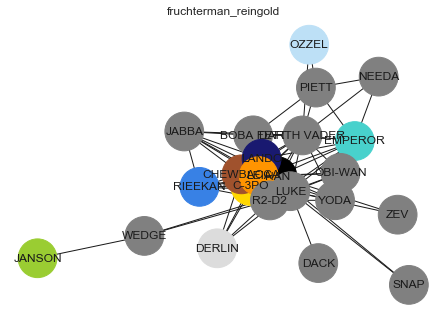

In [60]:
##Ex2
# Fruchterman Reingold
nx.draw(G, with_labels=True, node_size=1500, node_color=node_col, pos=nx.fruchterman_reingold_layout(G))
#nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.title("fruchterman_reingold")


In [57]:
nx.write_graphml(G, "fruchterman_reingold.graphml")

Text(0.5, 1.0, 'circular')

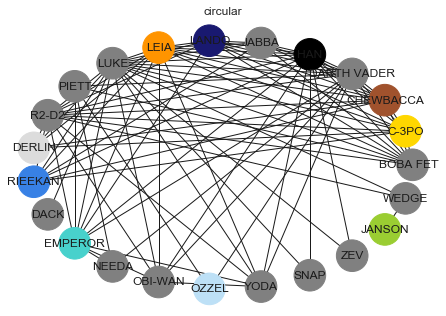

In [62]:
# Circular
nx.draw(G, with_labels=True,node_size=1000, node_color=node_col,pos=nx.circular_layout(G))
plt.title("circular")


In [63]:
nx.write_graphml(G, "circular.graphml")

Text(0.5, 1.0, 'random')

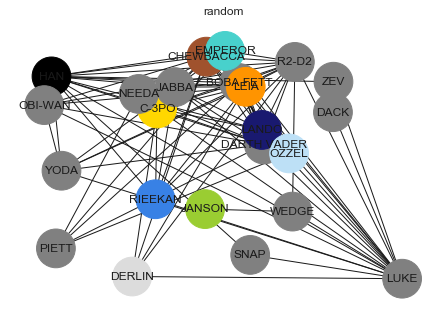

In [64]:
# Random
nx.draw(G, with_labels=True, node_size=1500, node_color=node_col, pos=nx.random_layout(G))
plt.title("random")

In [65]:
nx.write_graphml(G, "random.graphml")

Text(0.5, 1.0, 'spring')

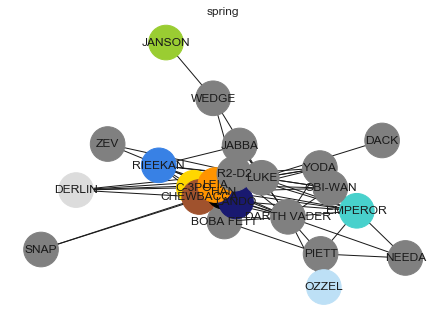

In [66]:
# Spring

nx.draw(G, with_labels=True, node_size=1200, node_color=node_col, pos=nx.spring_layout(G))
plt.title("spring")



In [67]:
nx.write_graphml(G, "spring.graphml")